<a href="https://colab.research.google.com/github/SohailDigital/FMML/blob/main/FMML_Aug22_M1Lab2_DataFeatures%26Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The TASK is completed and is the cell where the task is given**

## FMML Module 1, Lab 2<br>
Module Coordinator : amit.pandey@research.iiit.ac.in <br>

### The aim of this lab is to introduce DATA and FEATURES.
We will study: Feature extraction and Data Augmentation.
Let's get started.



Make a copy before running the cells

### Data can be anything like text, image , sound signals, and even a mix of multiple types (multimodal). We need to learn how to handle raw data, and how to use them for our analysis.

# Extracting features from data


 



In [ ]:
## Standard Imports.

! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams 
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=1b905887a8b81d3339f7c2181efb5e4bb4fba1be427477e06d872e0dd0232f9c
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


## What are features? 
### Features are individual independent variables that act like an input to your system. 
A very basic example is: In z = x + y, x and y are the features.
We can have simple features like above or even more complex features learned by our machine learning models (we will study these later on).

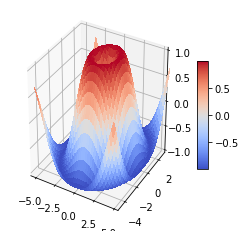

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

from mpl_toolkits.mplot3d.axes3d import get_test_data

 
# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(1))

# =============
# First subplot
# =============
# set up the axes for the first plot
ax = fig.add_subplot(1, 1, 1, projection='3d')

# plot a 3D surface like in the example mplot3d/surface3d_demo
X = np.arange(-5, 5, 0.25) # feature 1
Y = np.arange(-5, 5, 0.25) # feature 2
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R) #output
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0.8, antialiased=False)
ax.set_zlim(-1.01, 1.01)
ax.set_ylim(-5,3)
fig.colorbar(surf, shrink=0.5, aspect=10)

# Part 2: Features of text
How do we apply machine learning on text? We can't directly use the text as input to our algorithms. We need to convert them to features.They are converted into vectors (embeddings) or one hot encoded.  Let us explore a simple way of converting text to features. 

Let us download a few documents off Wikipedia.

In [ ]:
## set language and then download the data.

topic1 = 'Giraffe'
topic2 = 'Elephant'
wikipedia.set_lang('en') 
eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content
wikipedia.set_lang('fr')
fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content



This is what the text looks like:

In [ ]:
fr2 ## the french textual data describing the second topic.

'Les éléphants sont des mammifères proboscidiens de la famille des Éléphantidés. Ils correspondent aujourd\'hui à trois espèces réparties en deux genres distincts. L\'éléphant de savane d\'Afrique et l\'éléphant de forêt d\'Afrique, autrefois regroupés sous la même espèce d\'« éléphant d\'Afrique », appartiennent au genre Loxodonta, tandis que l\'éléphant d\'Asie, anciennement appelé « éléphant indien », appartient au genre Elephas. Ils se différencient par certaines caractéristiques anatomiques, les éléphants d\'Asie étant en général plus petits avec des oreilles plus petites, ou encore une différence du bout de la trompe. Ces espèces survivantes font localement l\'objet de programmes ou de projets de réintroduction et de protection.\nLe mot français « éléphant » vient du mot latin elephantus qui tire son origine du grec ἐλέφας signifiant « ivoire » ou « éléphant ».\nL\'éléphant apparait dans de nombreuses cultures. Il est symbole de sagesse dans la culture asiatique, connu pour sa mé

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [ ]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters, i.e. if not a-z then replace with space.
  return text

In [ ]:
text1 = re.sub('[a-z]', '*', '« éléphant d\?Afrique »,')
text1

'« é*é***** *\\?A****** »,'

In [ ]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)

In [ ]:
print(eng1)

thegiraffeisalargeafricanhoofedmammalbelongingtothegenusgiraffaitisthetallestlivingterrestrialanimalandthelargestruminantonearthtraditionallygiraffeswerethoughttobeonespeciesgiraffacamelopardaliswithninesubspeciesmostrecentlyresearchersproposeddividingthemintouptoeightextantspeciesduetonewresearchintotheirmitochondrialandnucleardnaaswellasmorphologicalmeasurementssevenotherextinctspeciesofgiraffaareknownfromthefossilrecordthegiraffeschiefdistinguishingcharacteristicsareitsextremelylongneckandlegsitshornlikeossiconesanditsspottedcoatpatternsitisclassifiedunderthefamilygiraffidaealongwithitsclosestextantrelativetheokapiitsscatteredrangeextendsfromchadinthenorthtosouthafricainthesouthandfromnigerinthewesttosomaliaintheeastgiraffesusuallyinhabitsavannahsandwoodlandstheirfoodsourceisleavesfruitsandflowersofwoodyplantsprimarilyacaciaspecieswhichtheybrowseatheightsmostotherherbivorescannotreachlionsleopardsspottedhyenasandafricanwilddogsmaypreyupongiraffesgiraffesliveinherdsofrelatedfemalesan

Instead of directly using characters as the features, to understand a text better, we may consider group of tokens i.e. ngrams as features.
 
For this example let us consider that each character is one word, and let us see how n-grams work.


## nltk library provides many tools for text processing, please explore them.

Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on. 

Let us count the frequency of each character in a text and plot it in a histogram.

In [ ]:
## Dont worry if you do not understand these functions right away, you can revisit them and follow step-by-step.

# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys()) 
  values = list(ngram.values())
  
  # sort the keys in alphabetic order
  combined = zip(keys, values) ## keys i.e. characters on x axis and their count in the given doc as values.
  zipped_sorted = sorted(combined, key=lambda x: x[0]) ## sorting based on keys, to get a to z order.
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

Let us compare the histograms of English pages and French pages. Can you spot a difference?

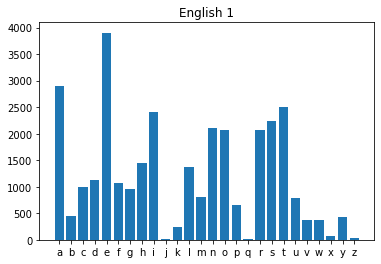

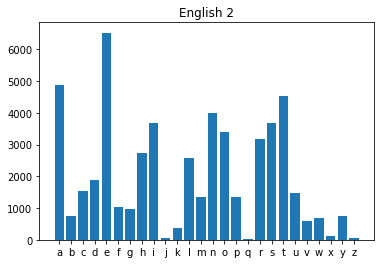

In [ ]:
## we passed ngrams 'n' as 1 to get unigrams. Unigram is nothing but single token (in this case character).
## ngrams imported from nltk, it returns ngrams from given string. Counter returns dictionary with keys as elements and counts as values.
unigram_eng1 = Counter(ngrams(eng1,1)) ##just to get count of each element. 
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

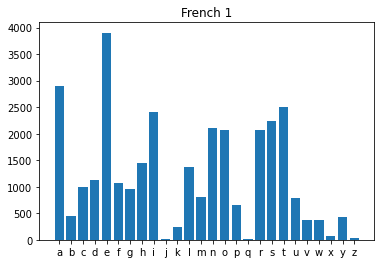

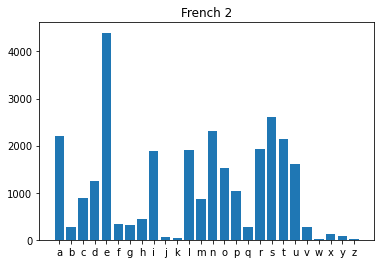

In [ ]:
unigram_fr1 = Counter(ngrams(fr1,1))
plothistogram(unigram_eng1)
plt.title('French 1')
plt.show()
unigram_fr2 = Counter(ngrams(fr2,1))
plothistogram(unigram_fr2)
plt.title('French 2')
plt.show()

## A good feature is one that helps in easy prediction and classification. 
## for ex : if you wish to differentiate between grapes and apples, size can be one of the useful features.

We can see that the unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at bigrams.

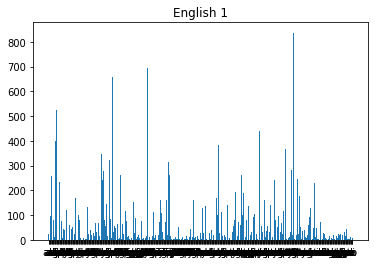

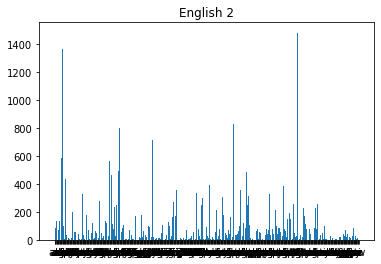

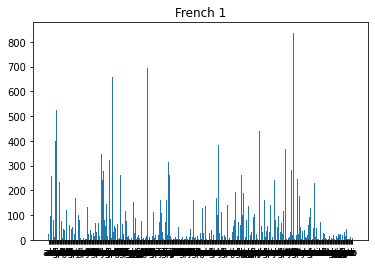

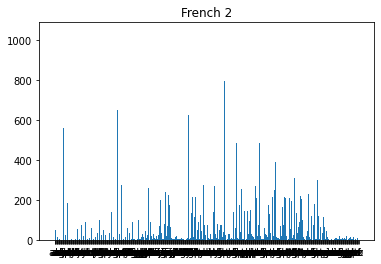

In [ ]:
## Now instead of unigram, we will use bigrams as features, and see how useful bigrams are as features.

bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_eng1)
plt.title('French 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()

Another way to visualize bigrams is to use a 2-dimensional graph.

In [ ]:
## lets have a lot at bigrams.

bigram_eng1


Counter({('t', 'h'): 837,
         ('h', 'e'): 695,
         ('e', 'g'): 164,
         ('g', 'i'): 279,
         ('i', 'r'): 314,
         ('r', 'a'): 441,
         ('a', 'f'): 258,
         ('f', 'f'): 262,
         ('f', 'e'): 286,
         ('e', 'i'): 145,
         ('i', 's'): 213,
         ('s', 'a'): 240,
         ('a', 'l'): 399,
         ('l', 'a'): 182,
         ('a', 'r'): 323,
         ('r', 'g'): 39,
         ('g', 'e'): 151,
         ('e', 'a'): 348,
         ('f', 'r'): 78,
         ('r', 'i'): 159,
         ('i', 'c'): 162,
         ('c', 'a'): 169,
         ('a', 'n'): 524,
         ('n', 'h'): 25,
         ('h', 'o'): 111,
         ('o', 'o'): 58,
         ('o', 'f'): 194,
         ('e', 'd'): 280,
         ('d', 'm'): 35,
         ('m', 'a'): 242,
         ('a', 'm'): 79,
         ('m', 'm'): 29,
         ('l', 'b'): 11,
         ('b', 'e'): 121,
         ('e', 'l'): 156,
         ('l', 'o'): 148,
         ('o', 'n'): 367,
         ('n', 'g'): 329,
         ('i', 'n'):

In [ ]:
## a function to plot 2-D histogram. The values are color mapped. 

def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))] #ord converts char to code
  plt.imshow(freq, cmap = 'jet')
  plt.colorbar()
  return freq

In [ ]:
ord

<function ord(c, /)>

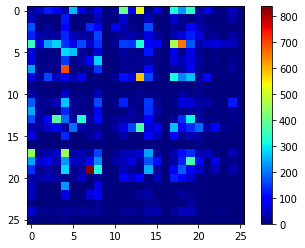

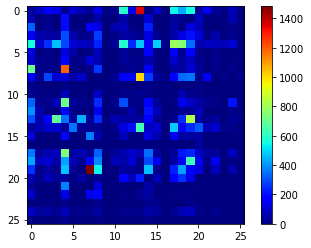

In [ ]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

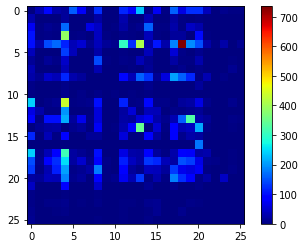

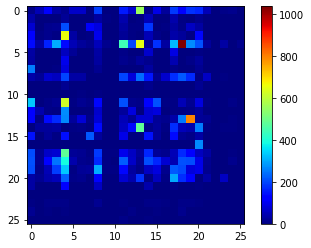

In [ ]:
bifr1 = plotbihistogram(bigram_fr1)
plt.show()
bifr2 = plotbihistogram(bigram_fr2)

Let us look at the top 10 ngrams for each text. 

In [ ]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')


In [ ]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nFrench 1:')
ShowTopN(bifr1)
print('\nFrench 2:')
ShowTopN(bifr2)


English 1:
('t', 'h') : 849.0
('h', 'e') : 703.0
('e', 's') : 661.0
('i', 'n') : 592.0
('a', 'n') : 535.0
('e', 'r') : 475.0
('r', 'e') : 449.0
('r', 'a') : 446.0
('a', 'l') : 403.0
('n', 'd') : 391.0

English 2:
('t', 'h') : 1475.0
('a', 'n') : 1361.0
('h', 'e') : 1188.0
('i', 'n') : 1008.0
('n', 't') : 826.0
('e', 'r') : 800.0
('e', 's') : 756.0
('r', 'e') : 752.0
('l', 'e') : 718.0
('h', 'a') : 712.0

French 1:
('e', 's') : 645.0
('l', 'e') : 393.0
('e', 'n') : 367.0
('d', 'e') : 349.0
('o', 'n') : 308.0
('n', 't') : 289.0
('r', 'e') : 289.0
('e', 'l') : 277.0
('r', 'a') : 230.0
('l', 'a') : 227.0

French 2:
('e', 's') : 1034.0
('n', 't') : 796.0
('d', 'e') : 657.0
('e', 'n') : 650.0
('l', 'e') : 626.0
('a', 'n') : 555.0
('o', 'n') : 484.0
('r', 'e') : 484.0
('e', 'l') : 439.0
('s', 'e') : 391.0


## At times, we need to reduce the number of features. We will discuss this more in the upcoming sessions, but a small example has been discussed here. Instead of using each unique token (a word) as a feature, we reduced the number of features by using 1-gram and 2-gram of characters as features.

We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics. 

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:
1. Try with different languages.
2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?
3. How can we use and visualize trigrams and higher n-grams?

## Features of Images. 
### Images in digital format are stored as numeric values, and hence we can use these values as features. for ex : a black and white (binary) image is stored as an array of 0  and 255 or 0 and 1.

# Part 2: Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [ ]:
from keras.datasets import mnist
 
#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()



11501568/11490434 [==============================] - 0s 0us/step


Extract a subset of the data for our experiment:

In [ ]:
no1 = train_X[train_y==1,:,:] ## dataset corresponding to number = 1.
no0 = train_X[train_y==0,:,:] ## dataset corresponding to number = 0.

Let us visualize a few images here:

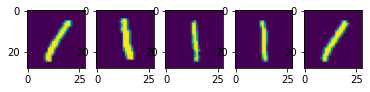

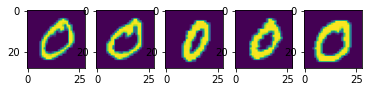

In [ ]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

In [ ]:
a = no1>0
a.shape, no1.shape

((6742, 28, 28), (6742, 28, 28))

In [ ]:
## to help you understand how the np.sum is working to find count of pixels that are not zero.

mtx = np.arange(8).reshape(2,2,2)
a = mtx>1
a[0][0][0]
type(a[0][0][0])


numpy.bool_

## We can even use value of each pixel as a feature. But let us see how to derive other features.

Now, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [ ]:
## sum of pixel values.

sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

In [ ]:
sum1.shape

(6742,)

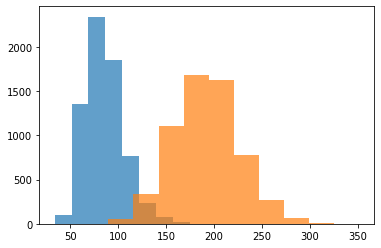

In [ ]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);



We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [ ]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  #print(img2)
  img2 = img2>0
  #print(img2)
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole




Visualize a few:

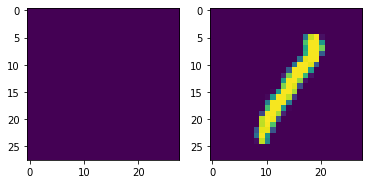

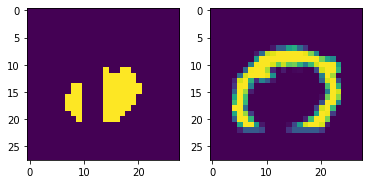

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Now let us plot the number of hole pixels and see how this feature behaves

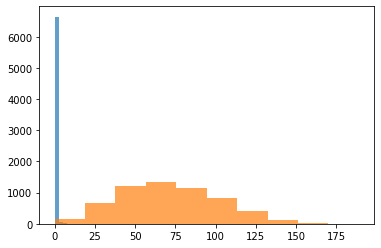

In [ ]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])
  
plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);

This feature works even better to distinguish between one and zero. 


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [ ]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

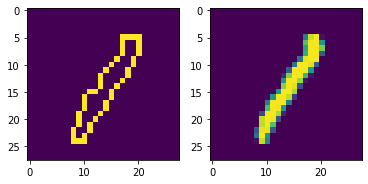

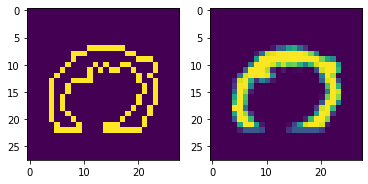

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

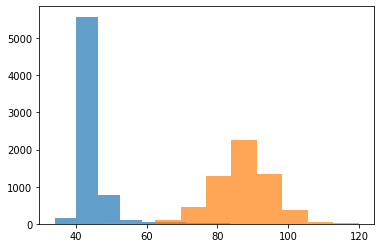

In [ ]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

What will happen if we plot two features together? 

Feel free to explore the above graph with your mouse. 


We have seen that we extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?
2. How would you test or visualize four or more features?
3. Can you come up with your own features?
4. Will these features work for different classes other than 0 and 1?
5. What will happen if we take more that two classes at a time?

## Features from CSV file

In [ ]:
import pandas as pd

df = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [ ]:
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
df.columns


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [ ]:
df = df.rename(columns={'longitude': 'newName1', 'oldName2': 'newName2'})
df.columns

Index(['newName1', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

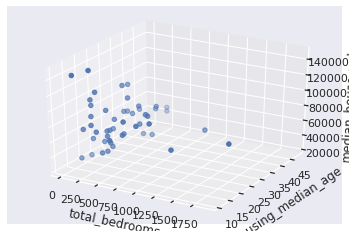

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df['total_bedrooms'][:50]
y = df['housing_median_age'][:50]
z = df['median_house_value'][:50]

ax.set_xlabel("total_bedrooms")
ax.set_ylabel("housing_median_age")
ax.set_zlabel("median_house_value")

ax.scatter(x, y, z)

plt.show()

In [ ]:
## Task :
## Download a CSV file from the internet, upload it to your google drive.
## Read the CSV file and plot graphs using different combination of features and write your analysis
## Ex : IRIS flower datasaet
from google.colab import drive

drive.mount('/content/gdrive')
import pandas as pd

ndf = pd.read_csv('/content/gdrive/MyDrive/appsheet/business-financial-data-june-2022-quarter-csv.csv')



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
ndf.head()

,Series_reference,Period,Data_value,Suppressed,STATUS,UNITS,Magnitude,Subject,Group,Series_title_1,Series_title_2,Series_title_3,Series_title_4,Series_title_5
0,BDCQ.SF1AA2CA,2016.06,1116.386,NaN,F,Dollars,6,Business Data Collection - BDC,Industry by financial variable (NZSIOC Level 2),Sales (operating income),Forestry and Logging,Current prices,Unadjusted,NaN
1,BDCQ.SF1AA2CA,2016.09,1070.874,NaN,F,Dollars,6,Business Data Collection - BDC,Industry by financial variable (NZSIOC Level 2),Sales (operating income),Forestry and Logging,Current prices,Unadjusted,NaN
2,BDCQ.SF1AA2CA,2016.12,1054.408,NaN,F,Dollars,6,Business Data Collection - BDC,Industry by financial variable (NZSIOC Level 2),Sales (operating income),Forestry and Logging,Current prices,Unadjusted,NaN
3,BDCQ.SF1AA2CA,2017.03,1010.665,NaN,F,Dollars,6,Business Data Collection - BDC,Industry by financial variable (NZSIOC Level 2),Sales (operating income),Forestry and Logging,Current prices,Unadjusted,NaN
4,BDCQ.SF1AA2CA,2017.06,1233.700,NaN,F,Dollars,6,Business Data Collection - BDC,Industry by financial variable (NZSIOC Level 2),Sales (operating income),Forestry and Logging,Current prices,Unadjusted,NaN


In [ ]:
ndf.columns
ndf=ndf.rename(columns={'Period':'PRD','Data_value':'DVL','Magnitude':'MGN'})
ndf.head()

,Series_reference,PRD,DVL,Suppressed,STATUS,UNITS,MGN,Subject,Group,Series_title_1,Series_title_2,Series_title_3,Series_title_4,Series_title_5
0,BDCQ.SF1AA2CA,2016.06,1116.386,NaN,F,Dollars,6,Business Data Collection - BDC,Industry by financial variable (NZSIOC Level 2),Sales (operating income),Forestry and Logging,Current prices,Unadjusted,NaN
1,BDCQ.SF1AA2CA,2016.09,1070.874,NaN,F,Dollars,6,Business Data Collection - BDC,Industry by financial variable (NZSIOC Level 2),Sales (operating income),Forestry and Logging,Current prices,Unadjusted,NaN
2,BDCQ.SF1AA2CA,2016.12,1054.408,NaN,F,Dollars,6,Business Data Collection - BDC,Industry by financial variable (NZSIOC Level 2),Sales (operating income),Forestry and Logging,Current prices,Unadjusted,NaN
3,BDCQ.SF1AA2CA,2017.03,1010.665,NaN,F,Dollars,6,Business Data Collection - BDC,Industry by financial variable (NZSIOC Level 2),Sales (operating income),Forestry and Logging,Current prices,Unadjusted,NaN
4,BDCQ.SF1AA2CA,2017.06,1233.700,NaN,F,Dollars,6,Business Data Collection - BDC,Industry by financial variable (NZSIOC Level 2),Sales (operating income),Forestry and Logging,Current prices,Unadjusted,NaN


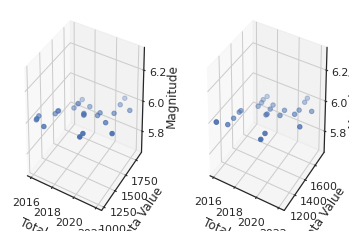

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


sns.set(style = "ticks")

fig = plt.figure()
ax = fig.add_subplot(1,2,1, projection = '3d')

x = ndf['PRD'][:25]
y = ndf['DVL'][:25]
z = ndf['MGN'][:25]

ax.set_xlabel("Total Period")
ax.set_ylabel("Data Value")
ax.set_zlabel("Magnitude")

ax.scatter(x, y, z)


ax = fig.add_subplot(1,2,2, projection = '3d')
x = ndf['PRD'][26:50]
y = ndf['DVL'][26:50]
z = ndf['MGN'][26:50]

ax.set_xlabel("Total Period")
ax.set_ylabel("Data Value")
ax.set_zlabel("Magnitude")

ax.scatter(x, y, z)


plt.show()

# IRIS dataset 

In [11]:
from google.colab import drive

drive.mount('/content/gdrive')
import pandas as pd
nndf = pd.read_csv('/content/gdrive/MyDrive/appsheet/Iris.csv')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [12]:
nndf.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
nndf.columns
nndf=nndf.rename(columns={'SepalLengthCm':'Length_Sepal','SepalWidthCm':'Width_Sepal','PetalLengthCm':'Length_Petal','PetalWidthCm':'Width_Petal'})
nndf.head()

,Id,Length_Sepal,Width_Sepal,Length_Petal,Width_Petal,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


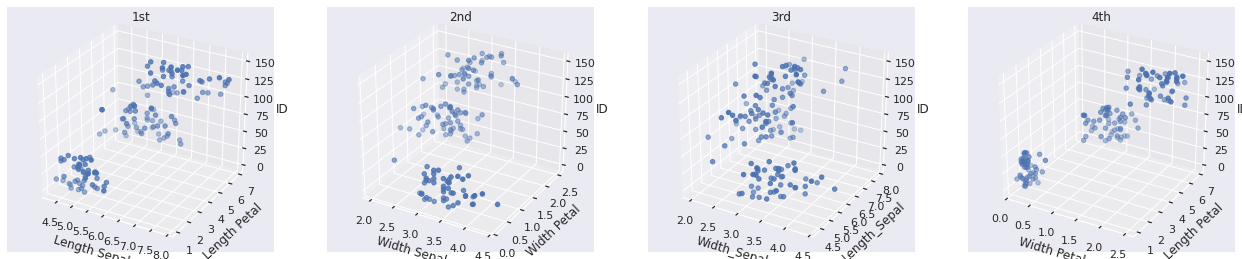

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


sns.set(style = "darkgrid")

fig = plt.figure(figsize=(22.0,4.5))

ax = fig.add_subplot(1,4,1, projection = '3d')

x = nndf['Length_Sepal'][:150]
y = nndf['Length_Petal'][:150]
z = nndf['Id'][:150]

ax.set_title("1st")
ax.set_xlabel("Length Sepal")
ax.set_ylabel("Length Petal")
ax.set_zlabel("ID")

ax.scatter(x, y, z)


ax = fig.add_subplot(1,4,2, projection = '3d')
x = nndf['Width_Sepal'][:150]
y = nndf['Width_Petal'][:150]
z = nndf['Id'][:150]

ax.set_title("2nd")
ax.set_xlabel("Width Sepal")
ax.set_ylabel("Width Petal")
ax.set_zlabel("ID")

ax.scatter(x, y, z)


ax = fig.add_subplot(1,4,3, projection = '3d')

x = nndf['Width_Sepal'][:150]
y = nndf['Length_Sepal'][:150]
z = nndf['Id'][:150]

ax.set_title("3rd")
ax.set_xlabel("Width_Sepal")
ax.set_ylabel("Length_Sepal")
ax.set_zlabel("ID")

ax.scatter(x, y, z)


ax = fig.add_subplot(1,4,4, projection = '3d')
x = nndf['Width_Petal'][:150]
y = nndf['Length_Petal'][:150]
z = nndf['Id'][:150]
ax.set_title("4th")
ax.set_xlabel("Width Petal")
ax.set_ylabel("Length Petal")
ax.set_zlabel("ID")

ax.scatter(x, y, z)


plt.show()

## Augmentation
It is a technique to increase the diversity of our training set by applying random (but realistic) transformations, such as image rotation, change of color etc. When we have limited training data, we can augment our data with help of these techniques.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
# set randomseed
rng = np.random.default_rng(seed=42)
from sklearn.utils.extmath import cartesian
from skimage.transform import rotate, AffineTransform, warp
import math

For this lab we will use a subset of MNIST that is very small, to better understand the effect of augmentation.

In [ ]:
#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X/255
test_X = test_X/255

print("original data size:",train_X.shape)


original data size: (60000, 28, 28)


In [ ]:
print(train_X[0].shape,train_y[0])

(28, 28) 5


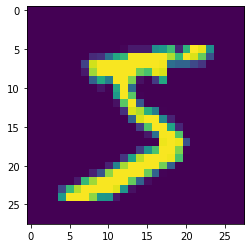

In [ ]:
plt.imshow(train_X[0])

In [ ]:
train_X = train_X[::1200,:,:].copy() # subsample. Otherwise it will take too long!
train_y = train_y[::1200].copy() # do the same to the labels

print("Now it is:", train_X.shape)

Now it is: (50, 28, 28)


Augmentation 1: rotation
Let us try rotating the image a little. We will use skimage library for this.

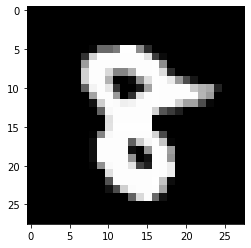

(28, 28)


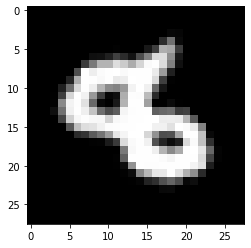

In [ ]:
plt.imshow(train_X[2], cmap='gray')
plt.show()
print(train_X[2].shape)
plt.imshow(rotate(train_X[2],45), cmap='gray')

After rotating, the the class of the image is still the same. Let us make a function to rotate multiple images by random angles. We want a slightly different image every time we run this function. So, we generate a random number between 0 and 1 and change it so that it lies between -constraint/2 and +constraint/2

In [ ]:
def augRotate(sample, angleconstraint):
  if angleconstraint==0:
    return sample

  print("shape of sample before is:", sample.shape)
  print("len(sample.shape)", len(sample.shape))
  if len(sample.shape)==2:
    sample = np.expand_dims(sample, 0)  # make sure the sample is 3 dimensional
    print("shape of sample is:", sample.shape)
  angle = rng.random(len(sample)) # generate random numbers for angles
  print("angle is:", angle)
  angle = (angle-0.5)*angleconstraint # make the random angle constrained
  print("angle with constraint is:", angle)
  nsample = sample.copy() # preallocate the augmented array to make it faster
  for ii in range(len(sample)):
    nsample[ii] = rotate(sample[ii], angle[ii])
  return np.squeeze(nsample) # take care if the input had only one sample.

This function returns a slightly different image each time we call it. So we can increase the number of images in the sample by any multiple. 

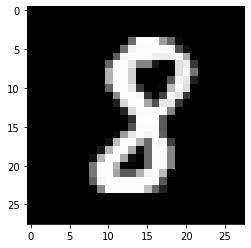

shape of sample before is: (28, 28)
len(sample.shape) 2
shape of sample is: (1, 28, 28)
angle is: [0.77395605]
angle with constraint is: [19.1769234]
shape of sample before is: (28, 28)
len(sample.shape) 2
shape of sample is: (1, 28, 28)
angle is: [0.43887844]
angle with constraint is: [-4.27850922]
shape of sample before is: (28, 28)
len(sample.shape) 2
shape of sample is: (1, 28, 28)
angle is: [0.85859792]
angle with constraint is: [25.10185439]


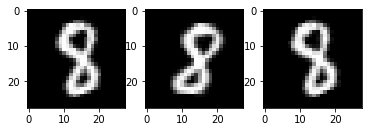

In [ ]:
sample = train_X[20]
angleconstraint = 70
# show the original image
plt.imshow(sample, cmap='gray')
plt.show()
plt.subplot(1,3,1)
plt.imshow(augRotate(sample, angleconstraint), cmap='gray') # show an augmented image
plt.subplot(1,3,2)
plt.imshow(augRotate(sample, angleconstraint), cmap='gray') # show another augmented image from the same sample
plt.subplot(1,3,3)
plt.imshow(augRotate(sample, angleconstraint), cmap='gray') # one more image from the same sample

Let us try one more augmentation, Shear: A transformation in which all points along a given line remain fixed while other points are shifted parallel to by a 
 distance proportional to their perpendicular distance from. Shearing a plane figure does not change its area. 

In [ ]:
def shear(sample, amount):
  tform = AffineTransform(shear = amount) # create the shear transform
  img = warp(sample, tform) # apply the shear
  # this makes the digit off-center. Since all the images in the test set are centralized, we will do the same here
  col = img.sum(0).nonzero()[0]
  row = img.sum(1).nonzero()[0]
  if len(col)>0 and len(row)>0:
    xshift = int(sample.shape[0]/2 - (row[0]+row[-1])/2)
    yshift = int(sample.shape[1]/2 - (col[0]+col[-1])/2)
    img = np.roll(img, (xshift, yshift),(0,1))
  return img

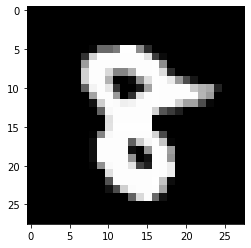

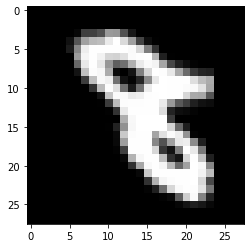

In [ ]:
sample = train_X[2]
plt.imshow(sample, cmap='gray')
plt.show()

# apply shear
plt.imshow(shear(sample, 0.4), cmap='gray')

## Let us also see skeletonization of image

In [ ]:
from skimage.morphology import skeletonize


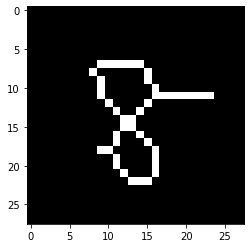

In [ ]:
skeleton = skeletonize(train_X[2],method='lee')
plt.imshow(skeleton, cmap='gray')

In [ ]:
#Structuring elements that are repeatedly used for thinning

S1 = np.array([[0,0,0],[-1,1,-1],[1,1,1]]) # -1 for dont care
S2 = np.array([[-1,0,0],[1,1,0],[-1,1,-1]])


def CheckMatch(window,kernel):
  for i in range(window.shape[0]):
        for j in range(window.shape[1]):
            if kernel[i,j]!=-1 and window[i,j]!=kernel[i,j]:
                return False
  return True

def ApplyKernel(image,kernel): #used
  height, width =  image.shape
  res = np.copy(image)
  for i in range(1,height-1):
    for j in range (1,width-1):
      window = image[i-1:i+2,j-1:j+2]
      #print('window shape',window.shape)
      Match_result = CheckMatch(window,kernel)
      if (Match_result):
        res[i,j]=0
  return res



def Skeletonization(image):
  '''pass binary image'''
  #new = np.copy(image)
  #old = np.zeros(image.shape,dtype=np.uint8)
  count = 1
  change = 1000
  while (change >0.01):
    print('count',count)
    new = image
    new = ApplyKernel(new,S1)
    new = ApplyKernel(new,S2)
    new = ApplyKernel(new,np.rot90(S1,1)) #90 degree rotate
    new = ApplyKernel(new,np.rot90(S2,1))
    new = ApplyKernel(new,np.rot90(S1,2)) # 180 degree rotate
    new = ApplyKernel(new,np.rot90(S2,2))
    new = ApplyKernel(new,np.rot90(S1,3)) # 270 degree rotate
    new = ApplyKernel(new,np.rot90(S2,3))
    count+= 1
    change = np.mean(np.abs(new-image))
    image = new
    plt.imshow(new,cmap='gray')
    plt.show()
  return new

In [ ]:
binarized  =( train_X[0] > 0 ).astype(np.uint8)

count 1


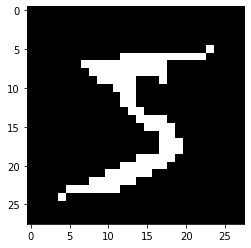

count 2


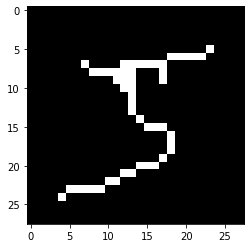

count 3


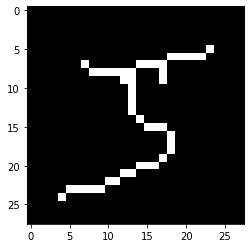

count 4


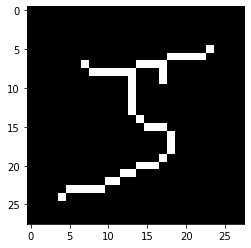

count 5


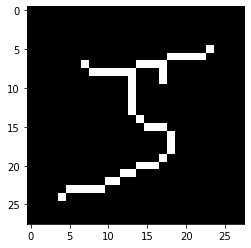

In [ ]:
skeleton_five = Skeletonization(binarized)